In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [86]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Unnamed: 0,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,...,5.0,A,A,A,A,A,A,A,B,D
1,2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,...,NaN,A,A,C,A,B,A,A,C,A
2,3,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,2016,2304400,Fortaleza,23,CE,21,F,0.0,...,NaN,A,A,A,A,C,A,A,B,A
3,4,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,2016,3304557,Rio de Janeiro,33,RJ,25,F,0.0,...,5.0,C,A,A,A,A,D,A,A,A
4,5,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,2016,1302603,Manaus,13,AM,28,M,0.0,...,NaN,A,A,A,A,A,A,A,A,A


In [87]:
# Pegando as variáveis  importante para o desafio
df = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4']]
df = df.dropna(0)
y = df['NU_NOTA_MT']
df = df.drop('NU_NOTA_MT', axis=1)

In [89]:
regr = LinearRegression()
regr.fit(df, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
print(f'Coêficiente {regr.intercept_}')
print(f'n coeficiente {len(regr.coef_)}')
print(f'Mean SQUARE ERROR (MSE){np.mean((regr.predict(df)- y)**2)}')

Coêficiente -14.485464836665699
n coeficiente 8
Mean SQUARE ERROR (MSE)5946.978271742632


In [84]:
df.head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4
0,436.3,495.4,581.2,399.4,520.0,120.0,120.0,120.0,80.0
1,474.5,544.1,599.0,459.8,580.0,140.0,120.0,120.0,120.0
5,439.7,583.2,410.9,364.5,620.0,120.0,120.0,120.0,160.0
6,420.1,604.2,484.5,529.2,560.0,100.0,120.0,120.0,120.0
7,619.6,625.8,611.2,566.7,620.0,140.0,120.0,120.0,120.0


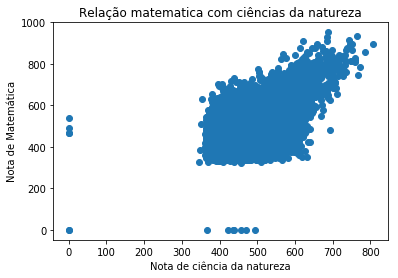

In [29]:
# Relacionamento de ciência da natureza vs matemática
plt.scatter(x.NU_NOTA_CN, y)
plt.xlabel('Nota de ciência da natureza')
plt.ylabel('Nota de Matemática')
plt.title('Relação matematica com ciências da natureza')
plt.show()

In [66]:
# Treinando com todas as variáveis
regr = LinearRegression()
regr.fit(df, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [67]:
print(f'Coêficiente {regr.intercept_}')
print(f'n coeficiente {len(regr.coef_)}')
print(f'Mean SQUARE ERROR (MSE){np.mean((regr.predict(x)- y)**2)}')

Coêficiente -23.35147056605649
n coeficiente 3
Mean SQUARE ERROR (MSE)5957.374847281955


In [74]:
cn = LinearRegression()
# df = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

cn.fit(df[['NU_NOTA_CN']], df.NU_NOTA_MT)

np.mean((df.NU_NOTA_MT - r2.predict(df[['NU_NOTA_CN']]))**2)

6536.516293662101

In [75]:
ch = LinearRegression()
# df = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

ch.fit(df[['NU_NOTA_CH']], df.NU_NOTA_MT)

np.mean((df.NU_NOTA_MT - ch.predict(df[['NU_NOTA_CH']]))**2)

7149.452884642573

In [76]:
lc = LinearRegression()
# df = df_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']]

lc.fit(df[['NU_NOTA_LC']], df.NU_NOTA_MT)

np.mean((df.NU_NOTA_MT - lc.predict(df[['NU_NOTA_LC']]))**2)

7530.759448579293

In [46]:
print(f'Mean SQUARE ERROR (MSE){np.mean((regr.predict(x)- y)**2)}')

Mean SQUARE ERROR (MSE)5957.374847281955


In [60]:
regr_cn = LinearRegression()
regr_cn.fit([cn], [y])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
np.dot(x, y, out=None)

ValueError: shapes (10097,3) and (10097,) not aligned: 3 (dim 1) != 10097 (dim 0)

ValueError: shapes (10097,3) and (10097,10097) not aligned: 3 (dim 1) != 10097 (dim 0)